In [1]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer

# **Bag of Words**

**To analyze text, words must be converted to a numeric representation and stored in objects such as vectors. The Bag of Words (BoW) model represents text as numerical feature vectors. Bag of Words stores a count of unique words across all the given documents.**

**Bag of Words is a relatively simple model to implement and understand. The disadvantages of Bag of Words include the model not accounting for the order of words and when applied to large data sets Bag of Words runs into the curse of dimensionality.**

<sup>Source: [Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750) by Sebastian Raschka and Vahid Mirjalili<sup/>

## **Simplified Bag of Words Example**

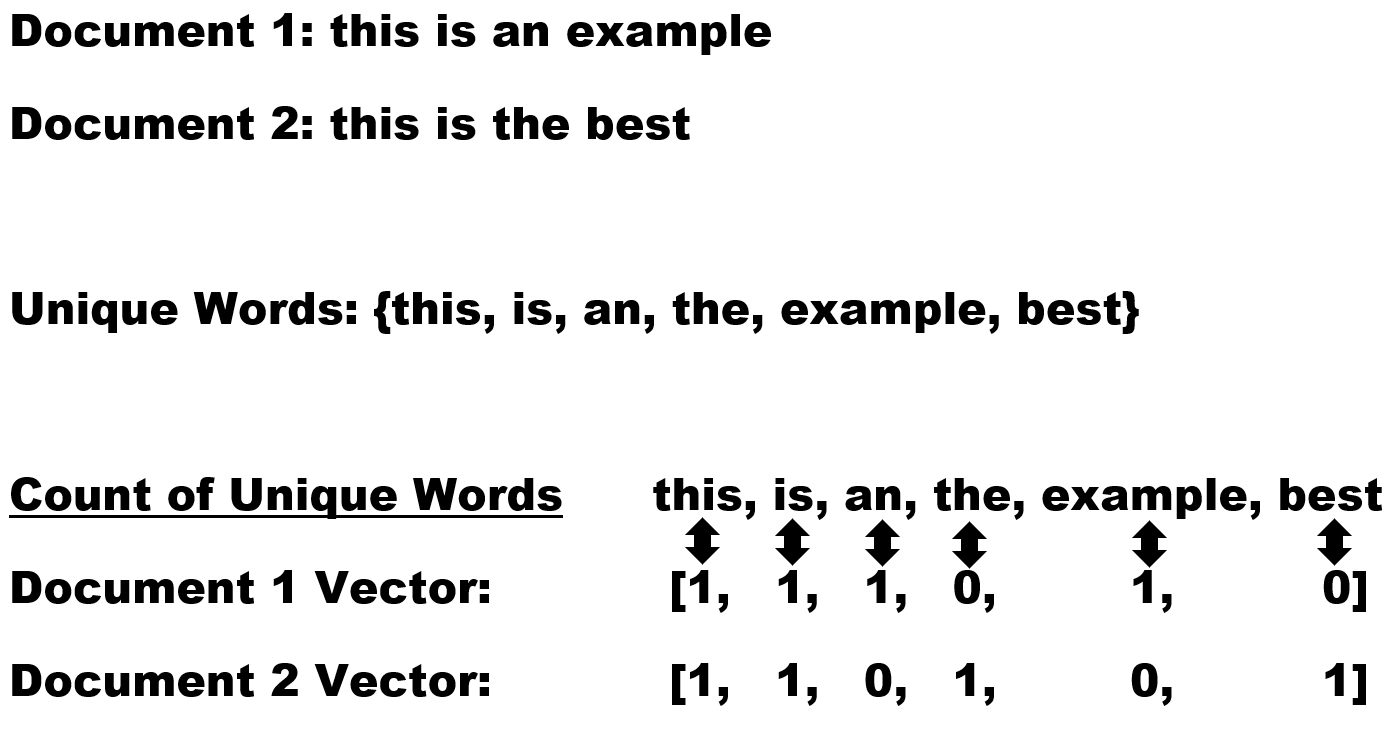

# **Data Set**

In [2]:
news_headlines = ['Stocks Slide After Jobless Claims Rise',
                   'Jobless Claims Rose Last Week, Still Historically Low',
                   'Stocks Extend Losses, Reversing Early-Week Gains',
                   'Jobless Claims Are Expected to Rise',
                   'More Americans apply for jobless benefits last week',
                   'NFL Week 4 Offense Rankings | NFL News, Rankings and Statistics',
                   'NFL rankings, figuring out the Ravens offense, Kenny Pickett gets the nod',
                   "Week 4's NFL Team of the Week - Offense",
                   '2022 NFL offense rankings',
                   'How Will Every NFL Offense Perform in 2022?']

# **Preprocess Text**

In [7]:
news_cleaned = [headline.lower().translate(str.maketrans('', '', string.punctuation))
               for headline in news_headlines]

print(news_cleaned)

['stocks slide after jobless claims rise', 'jobless claims rose last week still historically low', 'stocks extend losses reversing earlyweek gains', 'jobless claims are expected to rise', 'more americans apply for jobless benefits last week', 'nfl week 4 offense rankings  nfl news rankings and statistics', 'nfl rankings figuring out the ravens offense kenny pickett gets the nod', 'week 4s nfl team of the week  offense', '2022 nfl offense rankings', 'how will every nfl offense perform in 2022']


# **BoW Model**

In [20]:
def bow_vector(document_list):
    combined_string = ' '.join(document_list)
    word_set = [word for word in set(combined_string.split()) if len(word) > 1]
    
    filtered_docs = []
    for document in document_list:
        filtered_docs.append(' '.join([word for word in document.split() if len(word) > 1]))
        
    doc_word_count = []
    for document in filtered_docs:
        doc_word_count.append([document.split().count(word) for word in word_set])
        
    return {doc:vector for doc,vector in zip(filtered_docs,doc_word_count)}

In [21]:
def word_list(document_list):
    combined_string = ' '.join(document_list)
    return [word for word in set(combined_string.split()) if len(word) > 1]

In [22]:
df = pd.DataFrame(data = bow_vector(news_cleaned).values(),
                  columns = word_list(news_cleaned),
                  index = bow_vector(news_cleaned).keys())

df.head()

,jobless,perform,after,claims,americans,kenny,historically,news,statistics,losses,...,rankings,slide,nfl,figuring,low,expected,out,ravens,how,apply
stocks slide after jobless claims rise,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
jobless claims rose last week still historically low,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
stocks extend losses reversing earlyweek gains,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
jobless claims are expected to rise,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
more americans apply for jobless benefits last week,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Scikit-learn's Count Vectorizer Function** 

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_cleaned)

In [24]:
X.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       

In [25]:
vectorizer.get_feature_names()

C:\Users\Adrian\Downloads\nlp_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2022',
 '4s',
 'after',
 'americans',
 'and',
 'apply',
 'are',
 'benefits',
 'claims',
 'earlyweek',
 'every',
 'expected',
 'extend',
 'figuring',
 'for',
 'gains',
 'gets',
 'historically',
 'how',
 'in',
 'jobless',
 'kenny',
 'last',
 'losses',
 'low',
 'more',
 'news',
 'nfl',
 'nod',
 'of',
 'offense',
 'out',
 'perform',
 'pickett',
 'rankings',
 'ravens',
 'reversing',
 'rise',
 'rose',
 'slide',
 'statistics',
 'still',
 'stocks',
 'team',
 'the',
 'to',
 'week',
 'will']

# **References and Additional Learning**

## **Textbook**

- **[Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750) by Sebastian Raschka and Vahid Mirjalili**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**